# Image Gradients Using the Central Difference Formula

float32


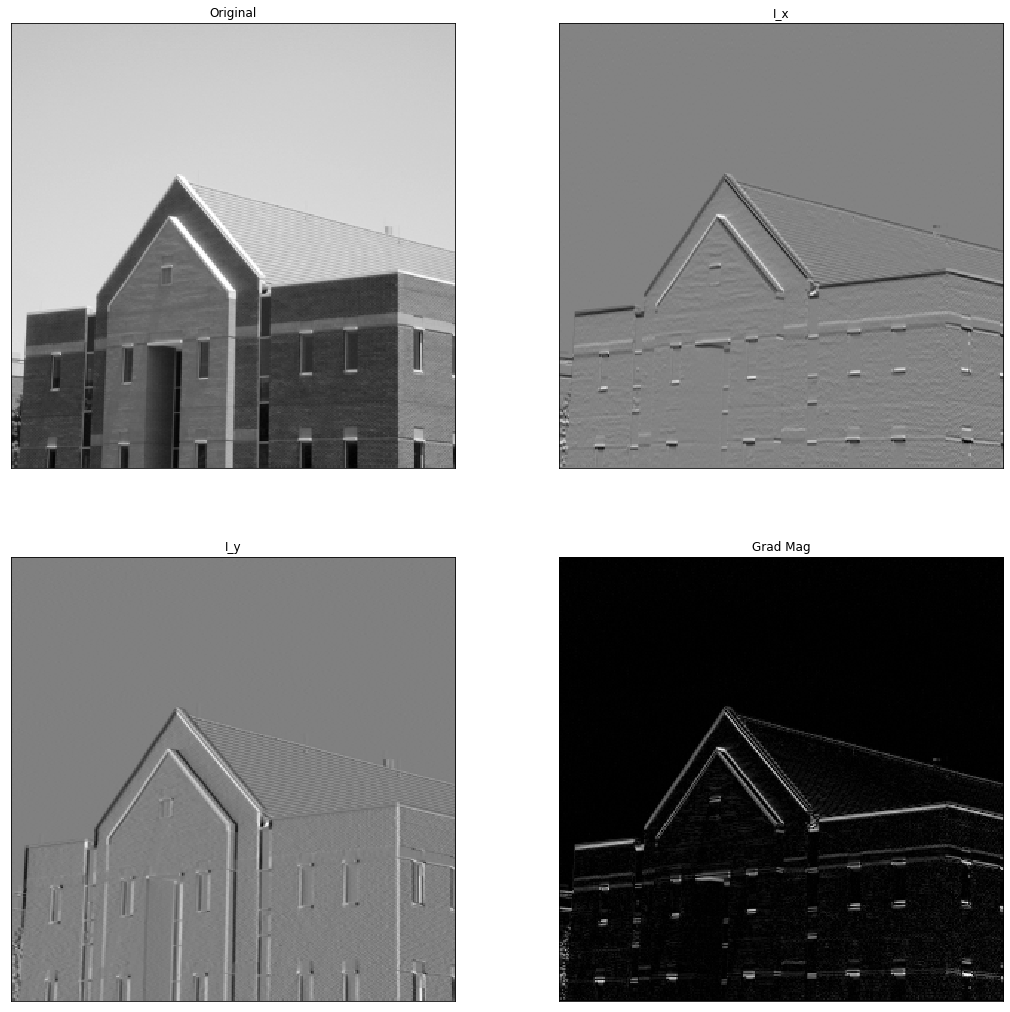

In [16]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/building.tif', cv.IMREAD_REDUCED_COLOR_2)
I = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

kernel = np.array([[-1], [0], [1]])
Ix = cv.filter2D(I, cv.CV_32F, kernel)
print(Ix.dtype)

kernel = np.array([[-1, 0, 1]])
Iy = cv.filter2D(I, cv.CV_32F, kernel)

grad_mag = np.sqrt(Ix**2, Iy**2)
grad_mag = cv.normalize(grad_mag,  grad_mag, 0, 255, cv.NORM_MINMAX)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(Ix + 127, cmap='gray')
axes[0,1].set_title('I_x')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(Iy + 127, cmap='gray')
axes[1,0].set_title('I_y')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(grad_mag, cmap='gray')
axes[1,1].set_title('Grad Mag')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

# Canny

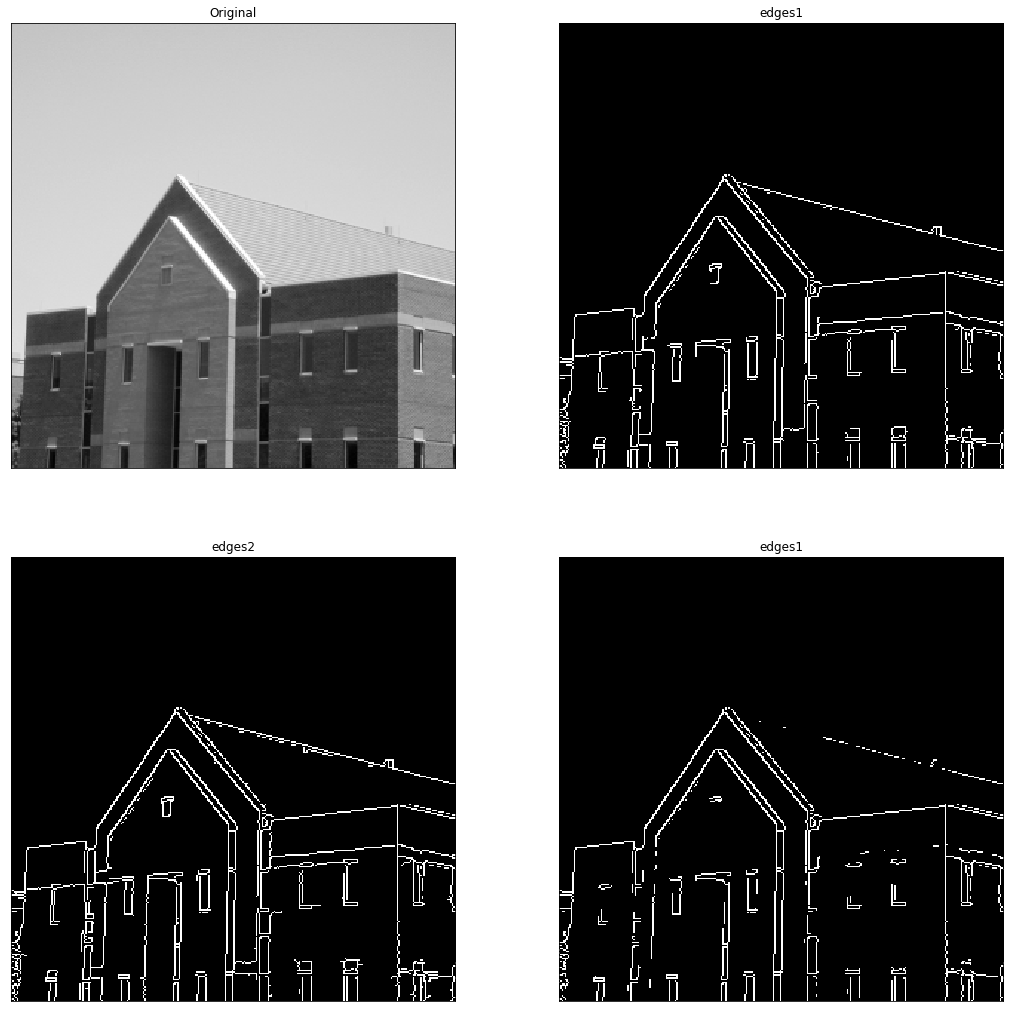

In [24]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./images/building.tif', cv.IMREAD_REDUCED_COLOR_2)
I = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

edges1 = cv.Canny(img,100,200)
edges2 = cv.Canny(img,50,200)
edges3 = cv.Canny(img,175,200)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(edges1, cmap='gray')
axes[0,1].set_title('edges1')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(edges2, cmap='gray')
axes[1,0].set_title('edges2')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(edges3, cmap='gray')
axes[1,1].set_title('edges1')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()


In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max

im = cv.imread('../EN5204Code/images/building.tif', cv.IMREAD_COLOR)
I = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
Ix = cv.filter2D(im, cv.CV_32F, kernel)
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
Iy = cv.filter2D(im, cv.CV_32F, kernel)

sigma = 3
ksize = 11
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21 = m12

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace*trace

img_copy_for_corners = np.copy(im)
img_copy_for_edges = np.copy(im)
for rowindex, response in enumerate(R):
    for colindex, r in enumerate(response):
        if r > 1.E7:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
            
R[R<1.E7] = 0
coordinates = peak_local_max(R, min_distance=2)
            
fig, axes  = plt.subplots(4,2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(I, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(Ix, cmap='gray')
axes[0,1].set_title('Ix')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(Iy, cmap='gray')
axes[1,0].set_title('Iy')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(R, cmap='jet')
axes[1,1].set_title('R')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

axes[2,0].imshow(img_copy_for_corners, cmap='gray')
axes[2,0].set_title('Corners')
axes[2,0].set_xticks([]), axes[2,0].set_yticks([])

axes[2,1].imshow(img_copy_for_edges, cmap='gray')
axes[2,1].set_title('Edges')
axes[2,1].set_xticks([]), axes[2,1].set_yticks([])


axes[3,0].imshow(im, cmap='gray')
axes[3,0].set_title('Exact Corners')
axes[3,0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
axes[3,0].set_xticks([]), axes[3,0].set_yticks([])

plt.show()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


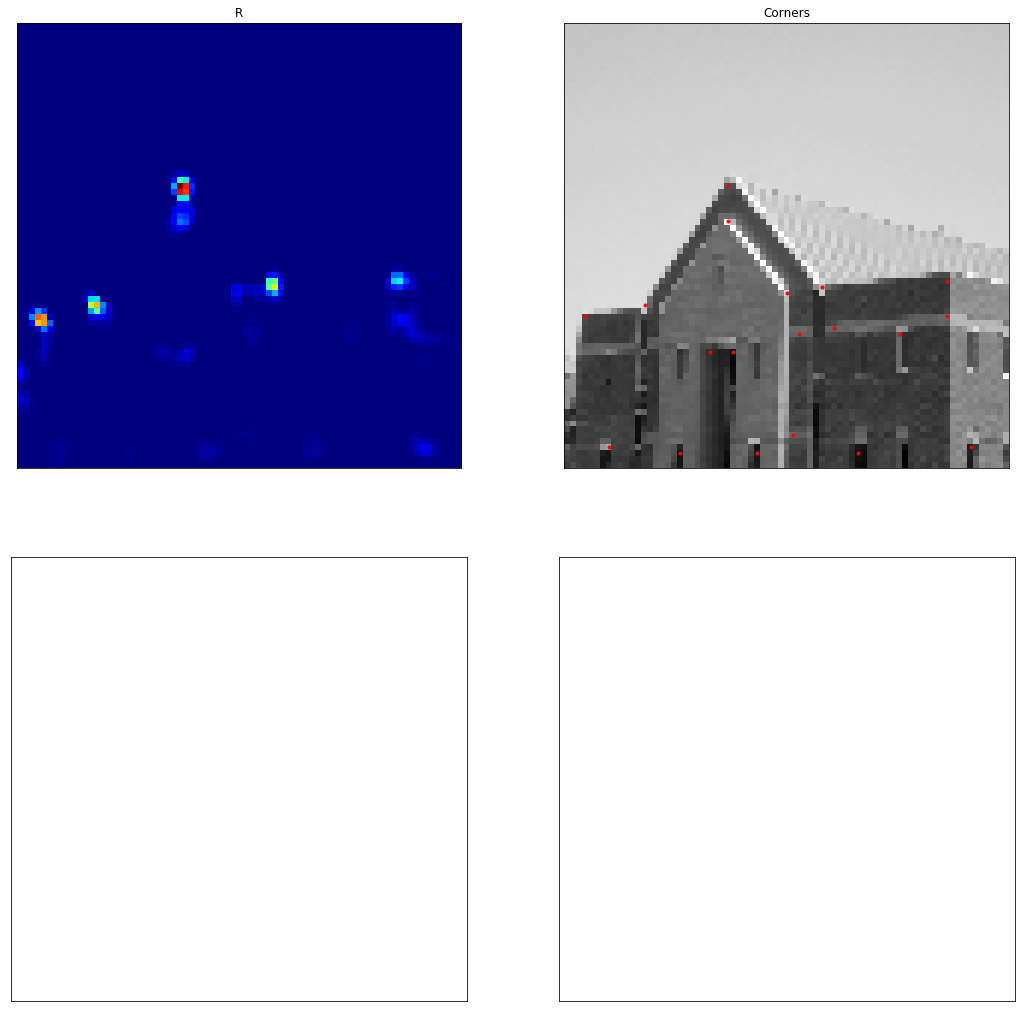

[[72 49]
 [72 32]
 [72 19]
 [71 68]
 [71  7]
 [69 38]
 [55 28]
 [55 24]
 [52 56]
 [52 39]
 [51 45]
 [49 64]
 [49  3]
 [47 13]
 [45 37]
 [44 43]
 [43 64]
 [33 27]
 [27 27]]


In [12]:
from skimage.feature import peak_local_max
print(R)

R[R<1.E7] = 0
coordinates = peak_local_max(R, min_distance=2)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))

axes[0,0].imshow(R, cmap='jet')
axes[0,0].set_title('R')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(img, cmap='gray')
axes[0,1].set_title('Corners')
axes[0,1].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
plt.show()
print(coordinates)